***Explanatioin***

here we want to use iterative mehods for image denoising.
we will use these 3 methods:
- jacobian iterative method
- gauss seidel iterative method
- SOR  iterative method

 in each part, first i will briefly explain it mathematicaly, them we'll see the code and at the end the result on real world.

**Load the image**

Mounted at /content/drive


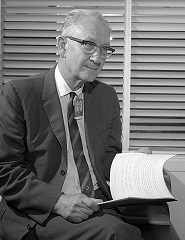

In [ ]:
# Mount Google Drive
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
drive.mount('/content/drive')

# Path to image file in Google Drive
img_path = '/content/drive/MyDrive/algebra/img.png'
image = cv2.imread(img_path)
# Display the original image
cv2_imshow(image)


***jacobian iterative method***


to solve AX=b in jacobian method, first, we write A like this:

A = D + L + U

D is diameeter of A,

L is anything under diameter.

U is anything upper the diemeter.

we proved that

DX(k+1) = -(L+U).X(k) + b

first we have a guess, x(0)


then, in each step we calculate x(k+1). based o what we said,

x(k+1) = -D-inverse.(L+U).x(k)+D-invrse(b)

here iteration matrix is Mj = -D-inverse.(L+U) and Cj = D-invrse(b)

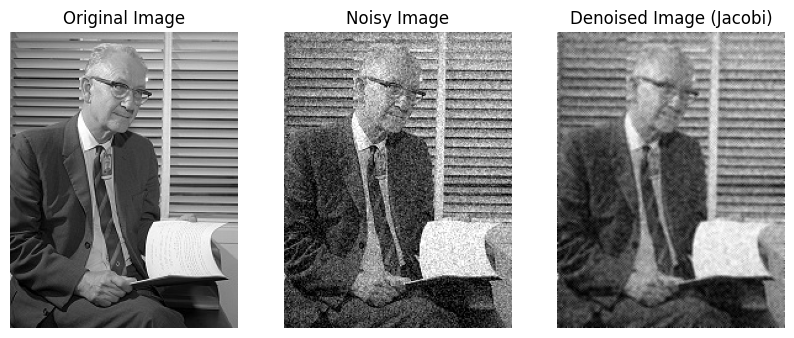

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, data, util
import cv2

def jacobi_iteration(image, iterations):
    height, width = image.shape
    new_image = np.copy(image)

    for _ in range(iterations):
        for i in range(1, height - 1):
            for j in range(1, width - 1):
                new_image[i, j] = 0.25 * (
                    image[i - 1, j] + image[i + 1, j] +
                    image[i, j - 1] + image[i, j + 1]
                )

    return new_image

def add_noise(image, sigma=0.1):
    noisy_image = util.random_noise(image, mode='gaussian', var=sigma**2)
    return np.clip(noisy_image, 0, 1)

# Load a sample image
original_image = cv2.imread(img_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)


# Add Gaussian noise to the image
noisy_image = add_noise(original_image)

# Perform Jacobi iteration for image denoising
denoised_image = jacobi_iteration(noisy_image, iterations=1000)

# Plot the results
plt.figure(figsize=(10, 5))

plt.subplot(131)
plt.title("Original Image")
plt.imshow(original_image, cmap='gray')
plt.axis('off')

plt.subplot(132)
plt.title("Noisy Image")
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

plt.subplot(133)
plt.title("Denoised Image (Jacobi)")
plt.imshow(denoised_image, cmap='gray')
plt.axis('off')

plt.show()


**gauss-sidel**

this method is similar to jacobian method, but in each step k+1, for updated values, we use the (k+1)th value.


if we write matrix A like this

A = L + D + U

then (L+D).x(k+1) = b - U.x(k) so,

x(k+1) = -(L+D)-inverse .U.x(k) + (L+D)-inverse.b

iteration matrix is Mgs = -(L+D)-inverse .U

Cgs = (L+D)-inverse.b

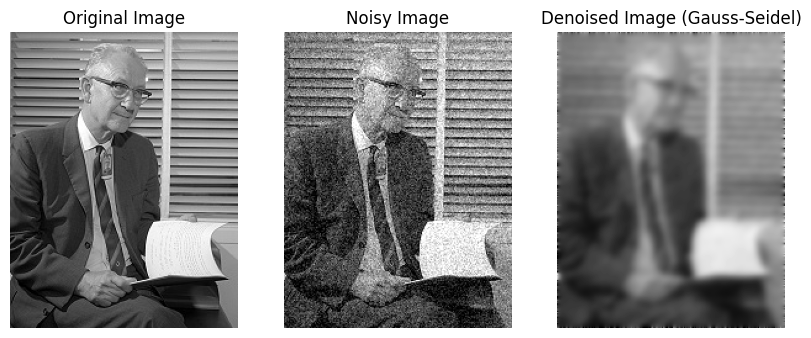

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import util
import cv2

def gauss_seidel_iteration(image, iterations):
    height, width = image.shape
    new_image = np.copy(image)

    for _ in range(iterations):
        for i in range(1, height - 1):
            for j in range(1, width - 1):
                new_image[i, j] = 0.25 * (
                    new_image[i - 1, j] + new_image[i + 1, j] +
                    new_image[i, j - 1] + new_image[i, j + 1]
                )

    return new_image

# Load a sample image
original_image = cv2.imread(img_path)

# Check if the image is loaded successfully
if original_image is None:
    print(f"Error: Unable to load the image from {img_path}")
else:
    # Convert the image to grayscale
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    # Add Gaussian noise to the image
    noisy_image = util.random_noise(original_image, mode='gaussian', var=0.1**2)
    noisy_image = np.clip(noisy_image, 0, 1)

    # Perform Gauss-Seidel iteration for image denoising
    denoised_image = gauss_seidel_iteration(noisy_image, iterations=10)

    # Plot the results
    plt.figure(figsize=(10, 5))

    plt.subplot(131)
    plt.title("Original Image")
    plt.imshow(original_image, cmap='gray')
    plt.axis('off')

    plt.subplot(132)
    plt.title("Noisy Image")
    plt.imshow(noisy_image, cmap='gray')
    plt.axis('off')

    plt.subplot(133)
    plt.title("Denoised Image (Gauss-Seidel)")
    plt.imshow(denoised_image, cmap='gray')
    plt.axis('off')

    plt.show()

**SOR**

The (SOR) method is a kind of relaxation methods. This method is a generalized or improved form of the Gauss–Seidel (GS) method and formed by adding a relaxation parameter. When the solution at th iteration is known then we can calculate the solution at kth iteration by applying the SOR method as follows Here,I(l+1) is the GS solution at (k+1)th iteration and w is the relaxation parameter, which is chosen in such a manner that it will accelerate the convergence of the method towards the solution.

x(k+1) = w.I(k+1) + (1-w.x(k))

this method is very similar to gauss-sidel, but we multiple a w to reach the answer faster. like this:

 (wL+D).x(k+1) = wb - ((1-w)D + wU).x(k) so,

x(k+1) = -(wL+D)-inverse .((w-1).D +wU).x(k) + w(wL+D)-inverse.b

Msor = -(wL+D)-inverse .((w-1).D +wU), Csor = w(wL+D)-inverse.b


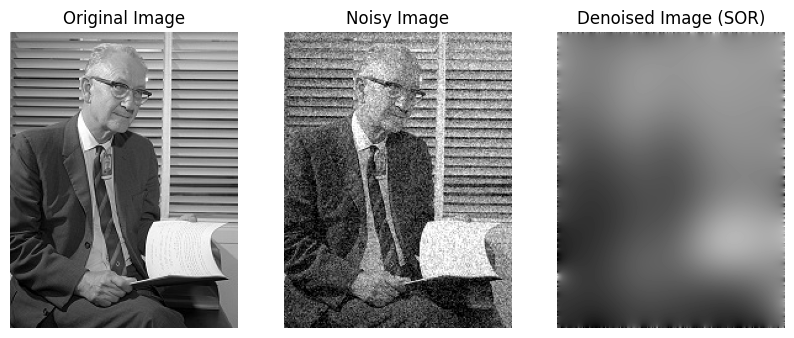

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import util
import cv2

def sor_iteration(image, iterations, omega):
    height, width = image.shape
    new_image = np.copy(image)

    for _ in range(iterations):
        for i in range(1, height - 1):
            for j in range(1, width - 1):
                new_image[i, j] = (1 - omega) * new_image[i, j] + omega * 0.25 * (
                    new_image[i - 1, j] + new_image[i + 1, j] +
                    new_image[i, j - 1] + new_image[i, j + 1]
                )

    return new_image

# Load a sample image
original_image = cv2.imread(img_path)

# Check if the image is loaded successfully
if original_image is None:
    print(f"Error: Unable to load the image from {img_path}")
else:
    # Convert the image to grayscale
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    # Add Gaussian noise to the image
    noisy_image = util.random_noise(original_image, mode='gaussian', var=0.1**2)
    noisy_image = np.clip(noisy_image, 0, 1)

    # Perform SOR iteration for image denoising
    omega = 1.6  # Over-relaxation parameter (adjust as needed)
    denoised_image = sor_iteration(noisy_image, iterations=100, omega=omega)

    # Plot the results
    plt.figure(figsize=(10, 5))

    plt.subplot(131)
    plt.title("Original Image")
    plt.imshow(original_image, cmap='gray')
    plt.axis('off')

    plt.subplot(132)
    plt.title("Noisy Image")
    plt.imshow(noisy_image, cmap='gray')
    plt.axis('off')

    plt.subplot(133)
    plt.title("Denoised Image (SOR)")
    plt.imshow(denoised_image, cmap='gray')
    plt.axis('off')

    plt.show()

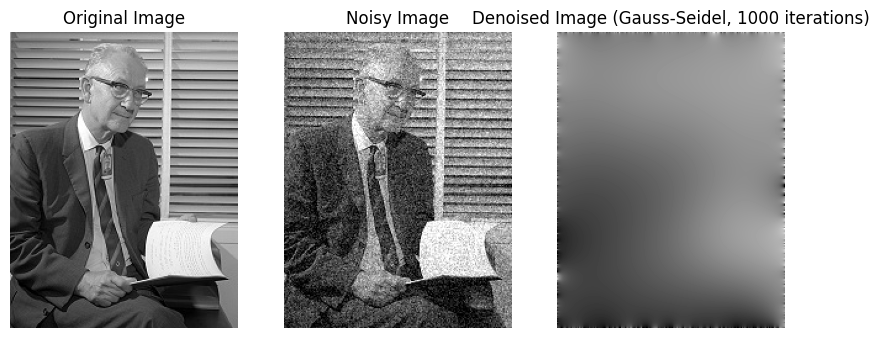

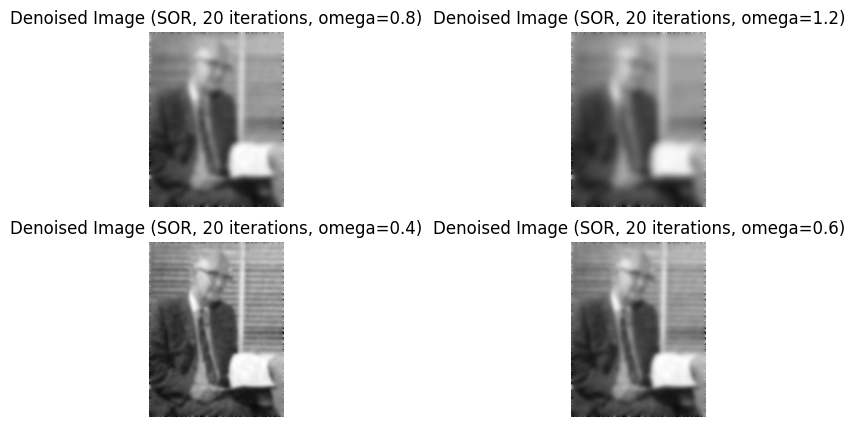

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import util
import cv2

def gauss_seidel_iteration(image, iterations):
    height, width = image.shape
    new_image = np.copy(image)

    for _ in range(iterations):
        for i in range(1, height - 1):
            for j in range(1, width - 1):
                new_image[i, j] = 0.25 * (
                    new_image[i - 1, j] + new_image[i + 1, j] +
                    new_image[i, j - 1] + new_image[i, j + 1]
                )

    return new_image

def sor_iteration(image, iterations, omega):
    height, width = image.shape
    new_image = np.copy(image)

    for _ in range(iterations):
        for i in range(1, height - 1):
            for j in range(1, width - 1):
                new_image[i, j] = (1 - omega) * new_image[i, j] + omega * 0.25 * (
                    new_image[i - 1, j] + new_image[i + 1, j] +
                    new_image[i, j - 1] + new_image[i, j + 1]
                )

    return new_image


# Load a sample image
original_image = cv2.imread(img_path)

original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Add Gaussian noise to the image
noisy_image = util.random_noise(original_image, mode='gaussian', var=0.1**2)
noisy_image = np.clip(noisy_image, 0, 1)

# Plot the original and noisy images
plt.figure(figsize=(10, 5))

plt.subplot(131)
plt.title("Original Image")
plt.imshow(original_image, cmap='gray')
plt.axis('off')

plt.subplot(132)
plt.title("Noisy Image")
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

# Experiment with Gauss-Seidel parameters
gauss_seidel_iterations = 1000
denoised_gauss_seidel = gauss_seidel_iteration(noisy_image, iterations=gauss_seidel_iterations)

plt.subplot(133)
plt.title(f"Denoised Image (Gauss-Seidel, {gauss_seidel_iterations} iterations)")
plt.imshow(denoised_gauss_seidel, cmap='gray')
plt.axis('off')

plt.show()

# Experiment with SOR parameters
plt.figure(figsize=(10, 5))

omega_values = [0.80, 1.2, 0.4,0.6]  # Experiment with different omega values
sor_iterations = 20

for i, omega in enumerate(omega_values):
    denoised_sor = sor_iteration(noisy_image, iterations=sor_iterations, omega=omega)

    plt.subplot(2, 2, i + 1)
    plt.title(f"Denoised Image (SOR, {sor_iterations} iterations, omega={omega})")
    plt.imshow(denoised_sor, cmap='gray')
    plt.axis('off')

plt.show()

**sources**

https://www.sciencedirect.com/science/article/pii/S0898122115001789
